In [1]:
import OmicsUtils.pydeseq_utils as pydeseq_utils
import pandas as pd

## I. Process Counts data

## 1.1 Read in counts data and metadata

In [2]:
count_data_kidney_cancer = pd.read_csv('./Transcriptomics/data/processed_data/stranded_first_data_with_labels.csv')
count_data_kidney_cancer
count_data_kidney_cancer[['Case ID', 'Project ID']]
kidney_cancer_count_data = count_data_kidney_cancer.iloc[:, :60660].T
counts = kidney_cancer_count_data.copy().reset_index()
counts = counts.set_index('index')
counts

,0,1,2,3,4,5,6,7,8,9,...,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642
index,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,4,677,1561,2296,4929,6,1340,1,2,2383,...,1,5554,8,2538,2005,0,1774,2,1928,2
ENSG00000000005.6,12,6,1,96,8,4,0,22,26,191,...,1,18,1,3,8,1,9,8,3,6
ENSG00000000419.13,9,499,693,714,936,13,904,15,8,840,...,8,948,17,984,482,8,1122,10,991,7
ENSG00000000457.14,294,457,175,456,841,251,394,410,961,835,...,311,798,1112,1325,341,300,332,142,461,185
ENSG00000000460.17,366,242,90,185,367,262,227,371,270,489,...,317,351,883,1062,189,291,204,322,280,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
ENSG00000288670.1,0,168,400,455,159,4,348,1,0,377,...,0,712,7,366,172,0,258,2,288,1
ENSG00000288671.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.2. Transpose the data for deseq2

In [3]:
counts = counts.T
counts = pd.concat( [count_data_kidney_cancer[['Case ID']], counts],axis=1)

In [4]:
counts.rename(columns={'Case ID':'Geneid'}, inplace=True)
counts.set_index('Geneid', inplace=True)
counts.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
Geneid,,,,,,,,,,,,,,,,,,,,,
C3L-00966,4,12,9,294,366,1,22,87,9,11,...,0,0,1,0,0,0,0,0,4,16
TCGA-MM-A563,677,6,499,457,242,1046,2378,1263,616,383,...,0,0,10,0,0,0,168,0,7,27
TCGA-GL-8500,1561,1,693,175,90,95,53,3168,1540,682,...,0,0,6,0,0,0,400,0,0,30
TCGA-BQ-5877,2296,96,714,456,185,195,1120,3311,1722,606,...,0,0,0,0,0,0,455,0,2,5
TCGA-KN-8423,4929,8,936,841,367,152,271,3019,1440,639,...,0,0,11,0,0,0,159,0,0,27


## II. Metadata pre-processing

## 2.1. Create a metadata dataframe with Case ID and Cancer subtype 

Only 3 cancers from TCGA (Renal Cell Carcinoma) are included in this

In [5]:
metadata = count_data_kidney_cancer[['Case ID', 'Project ID']]
metadata.columns = ['Sample', 'Condition']
metadata = metadata.set_index(keys='Sample') 
TCGA_rcc_metadata = metadata[metadata['Condition'].isin(values=['TCGA-KIRC', 'TCGA-KIRP', 'TCGA-KICH'])]
TCGA_rcc_metadata

,Condition
Sample,
TCGA-MM-A563,TCGA-KIRC
TCGA-GL-8500,TCGA-KIRP
TCGA-BQ-5877,TCGA-KIRP
TCGA-KN-8423,TCGA-KICH
TCGA-5P-A9K0,TCGA-KIRP
...,...
TCGA-CW-6087,TCGA-KIRC
TCGA-BQ-5884,TCGA-KIRP
TCGA-AK-3456,TCGA-KIRC


## 2.2. Subset the counts data to only include the 3 cancers

In [6]:
counts_rcc = counts[counts.index.isin(TCGA_rcc_metadata.index.values)]

## III. Running Deseq2

In [23]:
from importlib import reload
import OmicsUtils.pydeseq_utils as pydeseq_utils
reload(pydeseq_utils)

<module 'OmicsUtils.pydeseq_utils' from '/Users/abhilashdhal/Projects/OmicsUtils/pydeseq_utils.py'>

In [24]:
## Initialize the pydeseq_utils object
pydeseq_obj = pydeseq_utils.PyDeSeqWrapper(count_matrix=counts_rcc, metadata=TCGA_rcc_metadata, design_factors='Condition', groups = {'group1':'TCGA-KIRC', 'group2':'TCGA-KIRP'})
design_factor = 'Condition'
result = pydeseq_obj.run_deseq(design_factor=design_factor, group1 = 'TCGA-KIRC', group2 = 'TCGA-KIRP')

13/11//2023 05:59:1699878581 PM - INFO - PyDeSeqWrapper.run_deseq: Running DESeq2 for groups: {'group1': 'TCGA-KIRC', 'group2': 'TCGA-KIRP'}
13/11//2023 05:59:1699878581 PM - INFO - PyDeSeqWrapper.run_deseq: Running DESeq2 for groups: {'group1': 'TCGA-KIRC', 'group2': 'TCGA-KIRP'}
13/11//2023 05:59:1699878581 PM - INFO - PyDeSeqWrapper.run_deseq: Running DESeq2 for groups: {'group1': 'TCGA-KIRC', 'group2': 'TCGA-KIRP'}
13/11//2023 05:59:1699878581 PM - INFO - PyDeSeqWrapper.run_deseq: Running DESeq2  factor analysis with design factor: C and o
13/11//2023 05:59:1699878581 PM - INFO - PyDeSeqWrapper.run_deseq: Running DESeq2  factor analysis with design factor: C and o
13/11//2023 05:59:1699878581 PM - INFO - PyDeSeqWrapper.run_deseq: Running DESeq2  factor analysis with design factor: C and o
13/11//2023 05:59:1699878581 PM - INFO - PyDeSeqWrapper.run_deseq: Statistical analysis of TCGA-KIRC vs TCGA-KIRP in {'group1': 'TCGA-KIRC', 'group2': 'TCGA-KIRP'}
13/11//2023 05:59:1699878581 PM 

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Fitting size factors...
... done in 0.71 seconds.

Fitting dispersions...
... done in 12.99 seconds.

Fitting dispersion trend curve...
... done in 4.57 seconds.

Fitting MAP dispersions...
... done in 14.78 seconds.

Fitting LFCs...
... done in 30.33 seconds.

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Refitting 10827 outliers.

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/home

## IV. Data Interpretation of the results

## 4.1. Create a PCA plot

In [9]:
import scanpy as sc

In [10]:
sc.tl.pca(pydeseq_obj.dds)

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


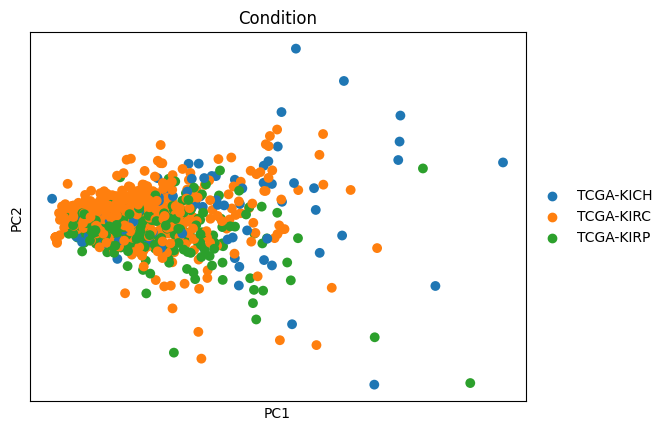

In [11]:
sc.pl.pca(pydeseq_obj.dds, color = 'Condition', size = 200)

## 4.2. Create a volcano plot of the results

In [52]:
import numpy as np

In [34]:
result.summary()

Running Wald tests...
... done in 26.52 seconds.



Log2 fold change & Wald test p-value: Condition TCGA-KIRC vs TCGA-KIRP


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003.15,1745.846969,-0.229056,0.054051,-4.237788,2.257328e-05,4.716019e-05
ENSG00000000005.6,24.765175,1.245152,0.164656,7.562141,3.964869e-14,1.391292e-13
ENSG00000000419.13,688.768193,0.013235,0.028567,0.463276,6.431665e-01,7.231618e-01
ENSG00000000457.14,456.921769,0.171048,0.031631,5.407658,6.385407e-08,1.593618e-07
ENSG00000000460.17,280.125529,0.348439,0.041999,8.296374,1.073368e-16,4.215969e-16
...,...,...,...,...,...,...
ENSG00000288669.1,0.164879,0.127490,0.423766,0.300851,7.635283e-01,NaN
ENSG00000288670.1,263.675230,-0.167515,0.038957,-4.300023,1.707803e-05,3.598875e-05
ENSG00000288671.1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000288674.1,3.072331,0.264358,0.088761,2.978326,2.898276e-03,4.982204e-03


## 4.2.1. Process results dataframe for plotting

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as n
import random

## 4.2.1.1 Read and merge dataframe of DESeq with gene annotation to display

In [160]:
gene_annotation = pd.read_csv('./Transcriptomics/data/gene_annotation/gene_id_to_gene_name_mapping.csv')

results_df = result.results_df
results_df_filtered = results_df.dropna()
results_df_filtered = results_df_filtered.reset_index()
results_df_filtered['nlog10'] = -1*np.log10(results_df_filtered.padj)

results_df_filtered = results_df_filtered.merge(gene_annotation, left_on='index', right_on='gene_id')
results_df_filtered  = results_df_filtered .replace([np.inf, -np.inf], 300)
results_df_filtered.sort_values('padj', ascending=False)

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,nlog10,gene_id,gene_name
4797,ENSG00000118600.12,497.937357,-0.000004,0.029879,-0.000121,0.999904,0.999904,0.000042,ENSG00000118600.12,RXYLT1
26080,ENSG00000235196.3,0.204566,0.000078,0.364299,0.000215,0.999828,0.999851,0.000065,ENSG00000235196.3,Z68868.1
1153,ENSG00000071539.14,133.506374,-0.000023,0.080789,-0.000282,0.999775,0.999820,0.000078,ENSG00000071539.14,TRIP13
17434,ENSG00000200247.1,0.373922,-0.000196,0.604076,-0.000324,0.999741,0.999810,0.000083,ENSG00000200247.1,RNU6-254P
30471,ENSG00000251061.2,1.063364,0.000117,0.314020,0.000372,0.999703,0.999794,0.000089,ENSG00000251061.2,LINC02512
...,...,...,...,...,...,...,...,...,...,...
21165,ENSG00000224490.5,577.790849,4.755576,0.123465,38.517561,0.000000,0.000000,300.000000,ENSG00000224490.5,TTC21B-AS1
1744,ENSG00000087494.16,730.546390,5.894148,0.156149,37.747042,0.000000,0.000000,300.000000,ENSG00000087494.16,PTHLH
13974,ENSG00000177464.5,898.444596,3.328664,0.086959,38.278497,0.000000,0.000000,300.000000,ENSG00000177464.5,GPR4
8122,ENSG00000142319.18,2490.584653,7.940965,0.193696,40.997152,0.000000,0.000000,300.000000,ENSG00000142319.18,SLC6A3


## 4.2.1.2 Set outlier threshold for log2FoldChange and nlog10 padj using tukey's fences 

Tukey's fence's outlier thresholds are as follows: 

General form: $Outlier_{x} = k \times (q_{75} - q_{25}) + q_{75}$

- Upper outlier threshold: k = 3.0
- middle outlier threshold: k = 1.5 
- lower outlier threshold: k = 1.0

In [163]:
k = 3.0
log2_threshold = k*(np.percentile(results_df_filtered['log2FoldChange'], 75) - np.percentile(results_df_filtered['log2FoldChange'], 25)) + np.percentile(results_df_filtered['log2FoldChange'], 75)
log10_threshold = k*(np.percentile(results_df_filtered['nlog10'], 75) - np.percentile(results_df_filtered['nlog10'], 25)) + np.percentile(results_df_filtered['nlog10'], 75)

In [170]:
print(f"The threshold for log2FoldChange is {log2_threshold}")
print(f"The threshold for nlog10 is {log10_threshold}")

The threshold for log2FoldChange is 3.0146824737036013
The threshold for nlog10 is 61.22039206963072


In [166]:
#picked1 and picked2 simulate user lists of genes to label by color
picked1 = random.choices(population=results_df_filtered.gene_name.tolist(), weights = results_df_filtered.nlog10.tolist(), k = 250)
picked2 = random.choices(population=results_df_filtered.gene_name.tolist(), weights = results_df_filtered.nlog10.tolist(), k = 300)
picked2 = [x for x in picked2 if x not in picked1]

def map_color(a):
    log2FoldChange, gene_name, nlog10 = a
    
    if abs(log2FoldChange) < log2_threshold or nlog10 < log10_threshold:
        return 'Not significant'
    if gene_name in picked1:
        return 'picked1'
    if gene_name in picked2:
        return 'picked2'
    
    return 'Cherry picked'

results_df_filtered['color'] = results_df_filtered[['log2FoldChange', 'gene_name', 'nlog10']].apply(map_color, axis = 1)

#picked3 and picked24 simulate user lists of genes to label by shape
df = results_df_filtered.copy()
picked3 = random.choices(df.gene_name.tolist(), weights = df.nlog10.tolist(), k = 250)
picked4 = random.choices(df.gene_name.tolist(), weights = df.nlog10.tolist(), k = 300)
picked4 = [x for x in picked4 if x not in picked3]

def map_shape(symbol):
    if symbol in picked3:
        return 'picked3'
    if symbol in picked4:
        return 'picked4'
    
    return 'not_important'

df['shape'] = df.gene_name.map(map_shape)
df.head()

,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,nlog10,gene_id,gene_name,color,shape
0,ENSG00000000003.15,1745.846969,-0.229056,0.054051,-4.237788,2.257328e-05,4.716019e-05,4.326424,ENSG00000000003.15,TSPAN6,Not significant,not_important
1,ENSG00000000005.6,24.765175,1.245152,0.164656,7.562141,3.964869e-14,1.391292e-13,12.856582,ENSG00000000005.6,TNMD,Not significant,not_important
2,ENSG00000000419.13,688.768193,0.013235,0.028567,0.463276,6.431665e-01,7.231618e-01,0.140765,ENSG00000000419.13,DPM1,Not significant,not_important
3,ENSG00000000457.14,456.921769,0.171048,0.031631,5.407658,6.385407e-08,1.593618e-07,6.797616,ENSG00000000457.14,SCYL3,Not significant,not_important
4,ENSG00000000460.17,280.125529,0.348439,0.041999,8.296374,1.073368e-16,4.215969e-16,15.375103,ENSG00000000460.17,C1orf112,Not significant,not_important


## 4.2.2. Plot differentially expressed genes

## 4.2.2.1 FUll volcano plot

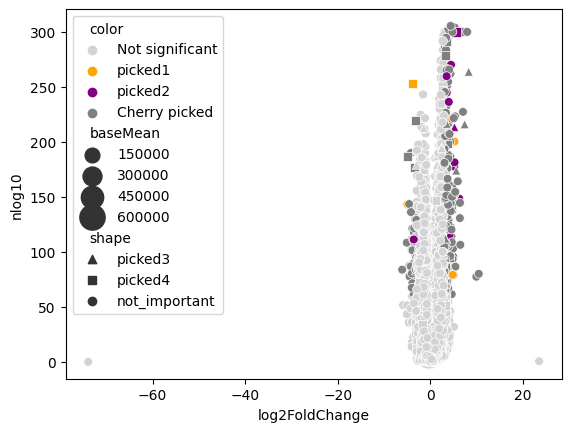

In [167]:
ax1 = sns.scatterplot(data = df, x = 'log2FoldChange', y = 'nlog10',
                    hue = 'color', hue_order = ['Not significant', 'picked1', 'picked2', 'Cherry picked'],
                    palette = ['lightgrey', 'orange', 'purple', 'grey'],
                    style = 'shape', 
                    style_order = ['picked3', 'picked4', 'not_important'],
                    markers = ['^', 's', 'o'], 
                    size = 'baseMean', sizes = (40, 400),
                    )


## 4.2.2.2 Zoomed in and well annotated plot plot

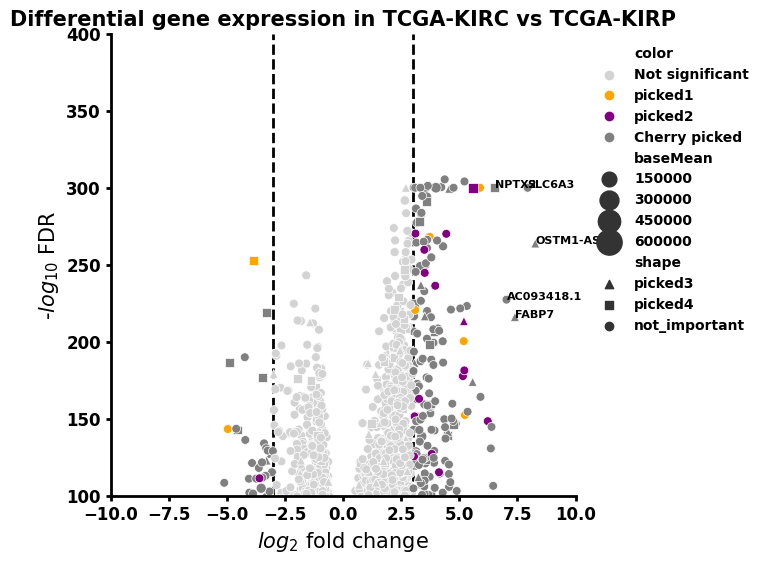

In [181]:
plt.figure(figsize = (6,6))
ax = sns.scatterplot(data = df, x = 'log2FoldChange', y = 'nlog10',
                    hue = 'color', hue_order = ['Not significant', 'picked1', 'picked2', 'Cherry picked'],
                    palette = ['lightgrey', 'orange', 'purple', 'grey'],
                    style = 'shape', 
                    style_order = ['picked3', 'picked4', 'not_important'],
                    markers = ['^', 's', 'o'], 
                    size = 'baseMean', sizes = (40, 400))

ax.axhline(log10_threshold, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(log2_threshold, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(-log2_threshold, zorder = 0, c = 'k', lw = 2, ls = '--')



## print texts for only very top genes
texts = []
for i in range(len(df)):
    if df.iloc[i].nlog10 > 150 and abs(df.iloc[i].log2FoldChange) > 6.5:
        texts.append(plt.text(x = df.iloc[i].log2FoldChange, y = df.iloc[i].nlog10, s = df.iloc[i].gene_name,
                             fontsize = 8, weight = 'bold'))
        
# adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc = 1, bbox_to_anchor = (1.4,1), frameon = False, prop = {'weight':'bold'})

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width = 2)
ax.set_xlim(-10, 10)
ax.set_ylim(100, 400)
plt.xticks(size = 12, weight = 'bold')
plt.yticks(size = 12, weight = 'bold')

plt.xlabel("$log_{2}$ fold change", size = 15)
plt.ylabel("-$log_{10}$ FDR", size = 15)
plt.title('Differential gene expression in TCGA-KIRC vs TCGA-KIRP', weight='bold', size = 15)
plt.savefig('volcano.png', dpi = 300, bbox_inches = 'tight', facecolor = 'white')

plt.show()